# Let's Start by importing needed libraries

In [1]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud



# Load the dataset and Display basic information about the dataset


In [2]:
data = pd.read_csv("/Users/saipavithraadoni/Desktop/Projects/ghibli.csv")
print("Dataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               500 non-null    object 
 1   user_id                500 non-null    object 
 2   prompt                 500 non-null    object 
 3   likes                  500 non-null    int64  
 4   shares                 500 non-null    int64  
 5   comments               500 non-null    int64  
 6   platform               500 non-null    object 
 7   generation_time        500 non-null    float64
 8   gpu_usage              500 non-null    int64  
 9   file_size_kb           500 non-null    int64  
 10  resolution             500 non-null    object 
 11  style_accuracy_score   500 non-null    int64  
 12  is_hand_edited         500 non-null    object 
 13  ethical_concerns_flag  500 non-null    object 
 14  creation_date          500 non-null  

In [3]:
print("\nFirst 5 Rows of the Dataset:")
print(data.head())


First 5 Rows of the Dataset:
                               image_id   user_id  \
0  77ce5c72-eb45-4651-bcb1-c0677c0fceaf  6a7adf3d   
1  7d66c67f-0d11-4ef9-895c-d865ef11fe40  523b8706   
2  d7978afd-3932-4cce-9a21-5f9bf2bc1f64  0e02592a   
3  cb34636a-a15c-4b15-999c-759dbb8896fe  9ed78a42   
4  7511fbb8-db05-4584-a3a4-e8bb525ed58b  69ec8f02   

                                         prompt  likes  shares  comments  \
0  Studio Ghibli-inspired ocean with giant fish    916     410       555   
1                Ghibli-style village at sunset   2965    1361       417   
2   A lone traveler exploring an enchanted ruin   4727     655       785   
3    Spirited Away-style bustling market street   1629    1954       212   
4  Magical Ghibli forest with floating lanterns   2573    1281       913   

    platform  generation_time  gpu_usage  file_size_kb resolution  \
0     Reddit             4.80         49          1684  1024x1024   
1     Reddit            11.11         81          2808  

In [4]:

print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Missing Values in Each Column:
image_id                 0
user_id                  0
prompt                   0
likes                    0
shares                   0
comments                 0
platform                 0
generation_time          0
gpu_usage                0
file_size_kb             0
resolution               0
style_accuracy_score     0
is_hand_edited           0
ethical_concerns_flag    0
creation_date            0
top_comment              0
dtype: int64


In [5]:
print("\nData Types of Each Column:")
print(data.dtypes)


Data Types of Each Column:
image_id                  object
user_id                   object
prompt                    object
likes                      int64
shares                     int64
comments                   int64
platform                  object
generation_time          float64
gpu_usage                  int64
file_size_kb               int64
resolution                object
style_accuracy_score       int64
is_hand_edited            object
ethical_concerns_flag     object
creation_date             object
top_comment               object
dtype: object


In [6]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
             likes       shares    comments  generation_time   gpu_usage  \
count   500.000000   500.000000  500.000000       500.000000  500.000000   
mean   2601.262000  1040.182000  506.872000         8.317780   61.124000   
std    1429.433498   562.668738  283.384066         3.903103   18.151131   
min     105.000000    13.000000    5.000000         1.540000   30.000000   
25%    1343.500000   587.750000  276.750000         5.027500   45.000000   
50%    2566.500000  1092.000000  518.000000         8.380000   63.000000   
75%    3913.250000  1502.000000  744.250000        11.540000   77.000000   
max    4944.000000  1999.000000  998.000000        14.990000   90.000000   

       file_size_kb  style_accuracy_score  
count    500.000000            500.000000  
mean    2511.822000             74.626000  
std     1390.178578             14.679001  
min      101.000000             50.000000  
25%     1374.750000             62.000000  
50%     

In [7]:
data.columns = data.columns.str.strip()
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")
if duplicate_rows > 0:
    data = data.drop_duplicates()
    print("Duplicate rows dropped.")
print("\nShape of the Dataset After Initial Cleaning:")
print(data.shape)


Number of Duplicate Rows: 0

Shape of the Dataset After Initial Cleaning:
(500, 16)


In [8]:
top10 = data['prompt'].value_counts().head(10)
print("Top 10 Most Used Prompts:")
for rank, (prompt, count) in enumerate(top10.items(), 1):
    print(f"{rank}. '{prompt}' (used {count} times)")

Top 10 Most Used Prompts:
1. 'Anime-style train passing through a fantasy world' (used 57 times)
2. 'Mysterious castle in the clouds, Ghibli-style' (used 49 times)
3. 'Ghibli-style mountain with floating islands' (used 48 times)
4. 'Cozy tea shop in a mystical town, Ghibli style' (used 44 times)
5. 'A lone traveler exploring an enchanted ruin' (used 43 times)
6. 'Ghibli-style night sky with glowing stars' (used 43 times)
7. 'Studio Ghibli-inspired ocean with giant fish' (used 39 times)
8. 'Spirited Away-style bustling market street' (used 38 times)
9. 'Mysterious temple hidden in a magical forest' (used 38 times)
10. 'Ghibli-style village at sunset' (used 34 times)


In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    return text
all_words = []
for prompt in data['prompt']:
    cleaned = clean_text(prompt)
    words = cleaned.split()
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    all_words.extend(filtered_words)

word_counts = Counter(all_words)
top10words = word_counts.most_common(10)

print("Top 10 Most Used Words:")
for rank, (word, count) in enumerate(top10words, 1):
    print(f"{rank}. '{word}' (appears {count} times)")

Top 10 Most Used Words:
1. 'ghiblistyle' (appears 174 times)
2. 'mysterious' (appears 87 times)
3. 'floating' (appears 82 times)
4. 'ghibli' (appears 78 times)
5. 'magical' (appears 72 times)
6. 'forest' (appears 72 times)
7. 'animestyle' (appears 57 times)
8. 'train' (appears 57 times)
9. 'passing' (appears 57 times)
10. 'fantasy' (appears 57 times)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saipavithraadoni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Extract Top 10 Liked Images

In [10]:
top10liked = data.nlargest(10, 'likes')[['prompt', 'likes', 'platform', 'resolution', 'style_accuracy_score']]
print("Top 10 Most-Liked Images:")
display(top10liked)

Top 10 Most-Liked Images:


,prompt,likes,platform,resolution,style_accuracy_score
485,Ghibli-style mountain with floating islands,4944,TikTok,2048x2048,97
155,A lone traveler exploring an enchanted ruin,4940,Twitter,1024x1024,63
234,Anime-style train passing through a fantasy world,4931,Twitter,1024x1024,69
418,Anime-style train passing through a fantasy world,4930,Instagram,1024x1024,70
215,Ghibli-style night sky with glowing stars,4928,Reddit,1024x1024,65
428,Mysterious temple hidden in a magical forest,4919,Twitter,512x512,52
235,Mysterious temple hidden in a magical forest,4918,Instagram,512x512,60
29,Mysterious temple hidden in a magical forest,4903,Reddit,512x512,95
276,A lone traveler exploring an enchanted ruin,4876,Reddit,1024x1024,85
115,Studio Ghibli-inspired ocean with giant fish,4861,TikTok,512x512,65


In [11]:
top_prompts = top10liked['prompt'].tolist()
words = []
for prompt in top_prompts:
    cleaned = prompt.translate(str.maketrans('', '', string.punctuation)).lower()
    words.extend([word for word in cleaned.split() 
                 if word not in stop_words and len(word) > 2])
common_words = Counter(words).most_common(10)
print("\nTop 10 Common Words in Popular Prompts:")
for word, count in common_words:
    print(f"- {word} (appears in {count} prompts)")





Top 10 Common Words in Popular Prompts:
- mysterious (appears in 3 prompts)
- temple (appears in 3 prompts)
- hidden (appears in 3 prompts)
- magical (appears in 3 prompts)
- forest (appears in 3 prompts)
- ghiblistyle (appears in 2 prompts)
- lone (appears in 2 prompts)
- traveler (appears in 2 prompts)
- exploring (appears in 2 prompts)
- enchanted (appears in 2 prompts)


In [12]:
platform_dist = top10liked['platform'].value_counts()
print("\nPlatforms in Top 10 Liked:")
print(platform_dist)


Platforms in Top 10 Liked:
platform
Twitter      3
Reddit       3
TikTok       2
Instagram    2
Name: count, dtype: int64


In [13]:
avg_metrics = top10liked[['resolution', 'style_accuracy_score', 'likes']].describe()
print("\nAverage Metrics for Top 10:")
print(avg_metrics)


Average Metrics for Top 10:
       style_accuracy_score        likes
count             10.000000    10.000000
mean              72.100000  4915.000000
std               15.125034    27.329268
min               52.000000  4861.000000
25%               63.500000  4906.750000
50%               67.000000  4923.500000
75%               81.250000  4930.750000
max               97.000000  4944.000000


In [14]:

nltk.download('stopwords')
def get_top_words(prompts, top_n=20, extra_stopwords=[]):
    stop_words = set(stopwords.words('english') + extra_stopwords)  
    words = []
    for prompt in prompts:
        clean_prompt = prompt.translate(str.maketrans('', '', string.punctuation)).lower()         # Remove punctuation and lowercase
        words.extend([word for word in clean_prompt.split() 
                     if word not in stop_words and len(word) > 2])
    return Counter(words).most_common(top_n)
top_words = get_top_words(data['prompt'], 
                         extra_stopwords=["ghibli", "studio", "style", "ghiblistyle"]) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saipavithraadoni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Wordcloud of top 20 words

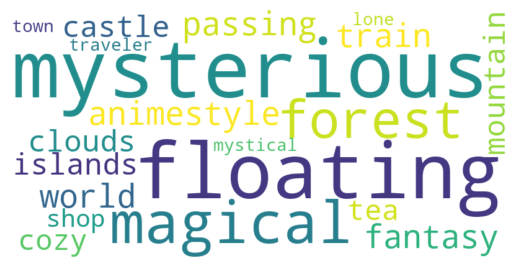

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Idnetifying if  Longer Generation Time Improve Style Accuracy

/Users/saipavithraadoni/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:1465: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/saipavithraadoni/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


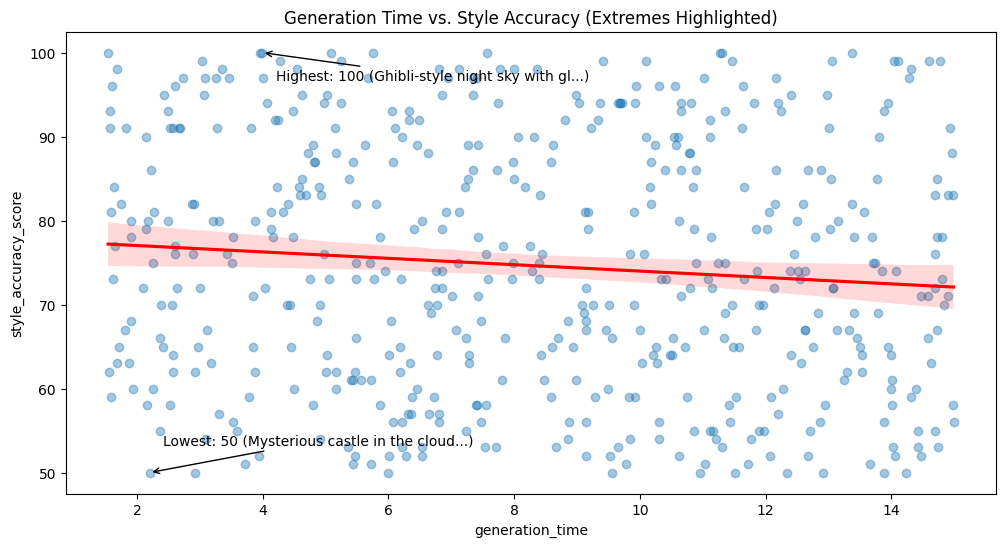

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.regplot(data=data, x='generation_time', y='style_accuracy_score', 
                 scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
highest = data.nlargest(1, 'style_accuracy_score')
lowest = data.nsmallest(1, 'style_accuracy_score')
ax.annotate(f"Highest: {highest['style_accuracy_score'].values[0]} ({highest['prompt'].values[0][:30]}...)", 
            xy=(highest['generation_time'], highest['style_accuracy_score']),
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax.annotate(f"Lowest: {lowest['style_accuracy_score'].values[0]} ({lowest['prompt'].values[0][:30]}...)", 
            xy=(lowest['generation_time'], lowest['style_accuracy_score']),
            xytext=(10, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.title("Generation Time vs. Style Accuracy (Extremes Highlighted)")
plt.show()

NO,as the accuracy  peaked when the generation time was at its lowest, and then steadily declined as the generation time increased. The graph clearly shows a downward sloping line, indicating this inverse relationship.